In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy

from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.sentiment.util import *

In [2]:
sid= SentimentIntensityAnalyzer()

In [3]:
consumer_key = 'RK9gel4LdospFlZUiAAZVK2Rf' 
consumer_secret = 'mFc3TXKaVt6KK5eh0mewOWwChT9UY6Qv3JZyhRaSxmBPIBqqlQ' 
access_token = '1041680613269397506-TCLWGLxvEa3X93YKZKl1anVr6SHE3Q'
access_token_secret = 'B5m3pPeGHblBHLvuFZAYR0qQo9EGQSvxz9iaUMkgKV8g2'

In [4]:
# Creating the authentication object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# Setting your access token and secret
auth.set_access_token(access_token, access_token_secret)
# Creating the API object while passing in auth information
api = tweepy.API(auth) 

In [5]:
# Creating the API object while passing in auth information
api = tweepy.API(auth)

# The search term you want to find
query = "fries"
# Language code (follows ISO 639-1 standards)
language = "en"

# Calling the user_timeline function with our parameters
results = api.search(q=query, lang=language)

In [6]:
# foreach through all tweets pulled
for tweet in results:
   # printing the text stored inside the tweet object
   print(tweet.text)

RT @ders808: cheese fries taste like 1998
RT @RukaTrue_: I remember I was talking to this nigga and he was telling me to come over cause he was cooking. It was like 11pm I got there…
@leonrestaurants TFW you’ve just done an epic spin class just so you can eat Leon fries &amp; they miss them off your o… https://t.co/EcfgmjKyyw
@ForeverMEM85 Come on cuz you know I got a little bit of everything. Popcorn, chicken, fries, you name it I ate it!
RT @BLanaghan: Right after your girl says she doesn’t want fries https://t.co/KdFwGpLWna
French Fries and French toast French Kissing French Girls
RT @RukaTrue_: I remember I was talking to this nigga and he was telling me to come over cause he was cooking. It was like 11pm I got there…
@YourGodMother1 @ms_phina Fries dipped in a vanilla shake.
find someone who looks at you the way @PRICEplaysdrums looks at fries #TrueLove https://t.co/Lsfe2MxBJd
RT @MaijaKoko: Remember how happy Jungkook was when he got ketchup on his fries :( @BTS_twt https://t.co/

In [7]:
tweet_terms = ['McCain Foods', 'Vegan', 'Natural', 'McCain Smiles', 'Frozen Potatoes', 'French Fries']

In [8]:
tweet_sent_dict = {}

In [24]:
tweet_df = None
for term in tweet_terms:
    results = api.search(q = term, lang = language)
    temp_tweet = []
    for a in results:
        temp_tweet.append(a.text)
    
    temp_df = pd.DataFrame({term : temp_tweet})
    
    score_list = []
    
    for t in temp_df[term]:
        score_list.append(list(sid.polarity_scores(t).values())[3])
        
    average  = sum(score_list) / float(len(score_list))
    
    tweet_sent_dict[term] = average
    
    
    
    
    
    
    #if tweet_df is None:
    #    tweet_df = pd.DataFrame({term : temp_tweet})
    #else:
    #    tweet_df.concat(a, axis = 1)

In [25]:
tweet_sent_dict

{'McCain Foods': -0.04122,
 'Vegan': 0.20459333333333335,
 'Natural': 0.24932666666666667,
 'McCain Smiles': 0.39965,
 'Frozen Potatoes': 0.027459999999999988,
 'French Fries': 0.19406}

In [32]:
sentiment = pd.DataFrame({'Hashtag' : list(tweet_sent_dict.keys()), 'Sentiment Score' : list(tweet_sent_dict.values())})

In [44]:
sentiment

,Hashtag,Sentiment Score
0,McCain Foods,-0.041220
1,Vegan,0.204593
2,Natural,0.249327
3,McCain Smiles,0.399650
4,Frozen Potatoes,0.027460
5,French Fries,0.194060


In [45]:
sentiment['Sentiment Score'] = pd.to_numeric(sentiment['Sentiment Score'])

TypeError: 'str' object is not callable

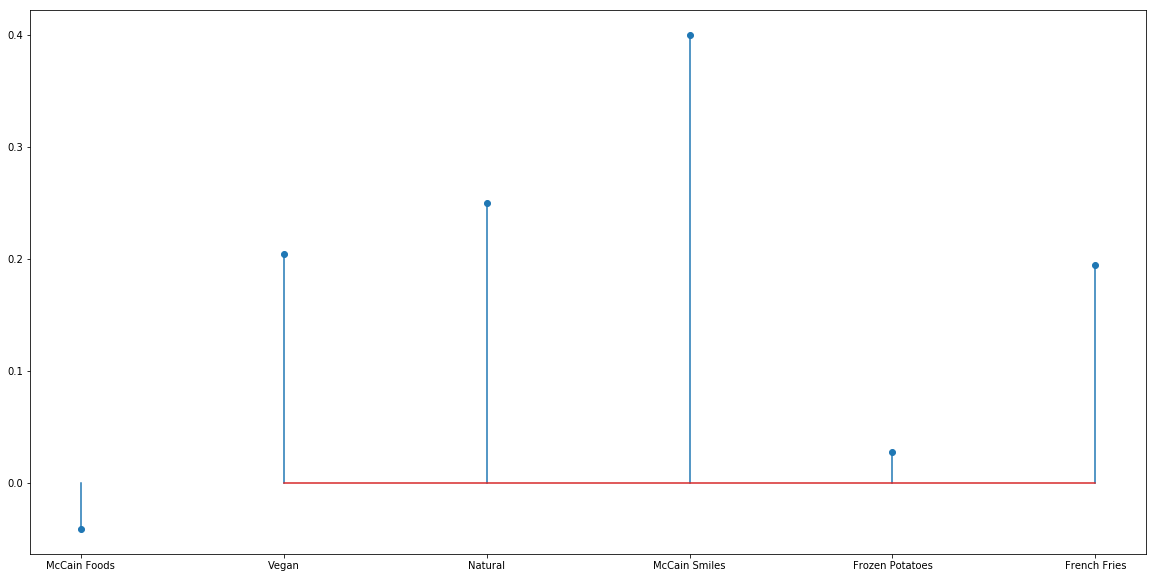

In [69]:
plt.figure(figsize = (20,10))
plt.stem(sentiment['Hashtag'], sentiment['Sentiment Score'])
plt.title("Twitter Hashtag Sentiment")

AttributeError: 'StemContainer' object has no attribute 'set_title'

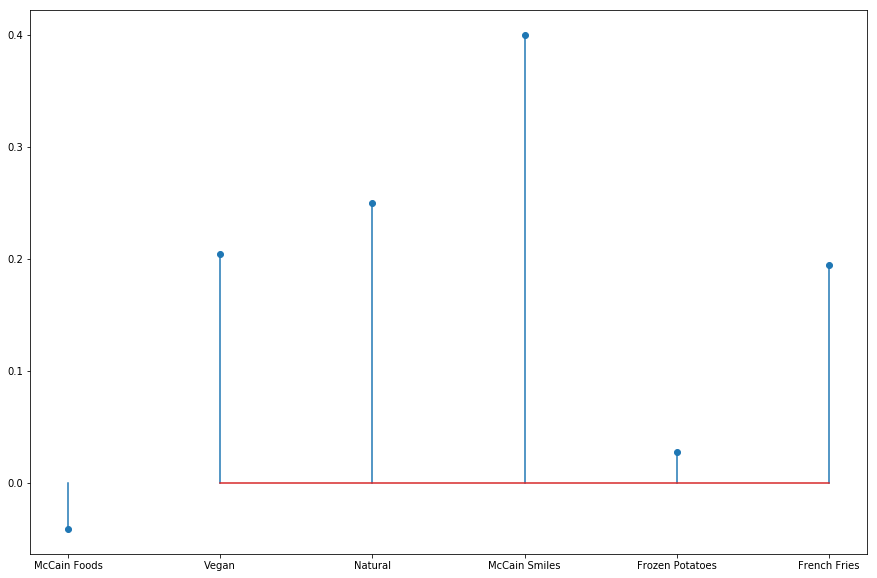